In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
pip install tensorflow==2.1.0

In [0]:
pip install tensorflow-gpu

In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
STOPWORDS=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
print(tf.__version__)

2.1.0


In [0]:
vocab_size=5000
ebmedding_size=64
max_length=200
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'
training_portion=0.8

articles=[]
labels=[]


In [0]:
with open('/content/drive/My Drive/Machine_Learning/bbc-text.csv', 'r') as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)


In [0]:
train_size = int(len(articles) * training_portion)
train_articles = articles[0: train_size]
train_labels = labels[0: train_size]
validation_articles = articles[train_size:]
validation_labels = labels[train_size:]


len(train_articles)
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[1])


[1856, 558, 222, 1857, 1338, 119, 1856, 558, 1, 1626, 674, 1, 1, 1903, 1904, 750, 262, 24, 2563, 1263, 4291, 23, 4983, 336, 1, 24, 785, 4292, 846, 1782, 4107, 3, 1626, 1426, 1856, 350, 181, 45, 4502, 602, 2110, 572, 1820, 3155, 1236, 67, 270, 3, 1, 102, 3060, 1400, 750, 1, 2110, 457, 846, 1485, 1, 1, 1158, 2493, 3381, 1964, 821, 1, 408, 3, 1, 351, 1580, 3, 1626, 21, 2563, 192, 1531, 3, 1, 3523, 351, 177, 3, 1626, 21, 2563, 1965, 1856, 1857, 3, 1, 1, 3523, 4291, 3, 1, 758, 2794, 2014, 2563, 4503, 3785, 119, 1856, 116, 308, 1465, 1503, 1108, 846, 1782, 484, 1, 3, 1108, 758, 750, 1, 242, 542, 1, 365, 1856, 2563, 257, 679, 3, 1626, 139, 721, 321, 1, 1, 558, 1, 1, 1, 1486, 2015, 1, 3, 1626, 1, 1856, 1, 4725, 1, 1624, 639, 3786, 1, 561, 2167, 1856, 350, 1, 79, 514, 805, 1624, 2719, 1, 610, 67, 1627, 4502, 1127, 255, 1, 229, 31, 775, 255, 388, 3, 1626, 542, 94, 12, 15, 115, 199, 1400, 119, 1, 1197, 3524, 1941, 2494, 4726, 2358, 1]


In [0]:
len(train_sequences)

1780

In [0]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
train_padded[0]

array([  91,  160, 1141, 1106,   49,  979,  755,    1,   89, 1304, 4288,
        129,  175, 3653, 1215, 1195, 1577,   42,    7,  893,   91,    1,
        334,   85,   20,   14,  130, 3261, 1216, 2421,  569,  451, 1376,
         58, 3378, 3521, 1661,    8,  921,  730,   10,  844,    1,    9,
        598, 1578, 1107,  395, 1940, 1106,  731,   49,  537, 1398, 2011,
       1624,  134,  249,  113, 2355,  795, 4980,  980,  584,   10, 3956,
       3957,  921, 2562,  129,  344,  175, 3653,    1,    1,   39,   62,
       2867,   28,    9, 4722,   18, 1305,  136,  416,    7,  143, 1423,
         71, 4501,  436, 4981,   91, 1107,   77,    1,   82, 2012,   53,
          1,   91,    6, 1008,  599,   89, 1304,   91, 1962,  131,  137,
        420,    9, 2868,   38,  152, 1235,   89, 1304, 4723,    7,  436,
       4981, 3153,    6, 2492,    1,  431, 1126,    1, 1424,  570, 1217,
       1902,    1,  766,    9,  537, 1398, 2011,  134, 2069,  400,  845,
       1963, 1601,   34, 1717, 2869,    1,    1, 24

In [0]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
validation_padded.shape

(445, 200)

In [0]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
validation_label_seq.shape

(445, 1)

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [0]:
def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, ebmedding_size),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(ebmedding_size)),
    tf.keras.layers.Dense(ebmedding_size, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [0]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_padded, training_label_seq, epochs=10, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/10
1780/1780 - 4s - loss: 2.6789e-10 - accuracy: 1.0000 - val_loss: 0.3338 - val_accuracy: 0.9596
Epoch 2/10
1780/1780 - 1s - loss: 1.3394e-10 - accuracy: 1.0000 - val_loss: 0.3375 - val_accuracy: 0.9596
Epoch 3/10
1780/1780 - 1s - loss: 2.6789e-10 - accuracy: 1.0000 - val_loss: 0.3430 - val_accuracy: 0.9573
Epoch 4/10
1780/1780 - 1s - loss: 2.0091e-10 - accuracy: 1.0000 - val_loss: 0.3432 - val_accuracy: 0.9573
Epoch 5/10
1780/1780 - 1s - loss: 2.0091e-10 - accuracy: 1.0000 - val_loss: 0.3488 - val_accuracy: 0.9573
Epoch 6/10
1780/1780 - 1s - loss: 1.3394e-10 - accuracy: 1.0000 - val_loss: 0.3543 - val_accuracy: 0.9573
Epoch 7/10
1780/1780 - 1s - loss: 2.0091e-10 - accuracy: 1.0000 - val_loss: 0.3598 - val_accuracy: 0.9551
Epoch 8/10
1780/1780 - 1s - loss: 2.6789e-10 - accuracy: 1.0000 - val_loss: 0.3616 - val_accuracy: 0.9573
Epoch 9/10
1780/1780 - 1s - loss: 2.0091e-10 - accuracy: 1.0000 - val_loss: 0.3629 - val_accuracy: 0.9573

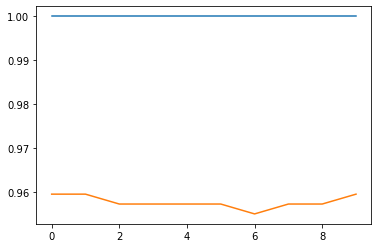

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])